## Dataset Overview
This data, represented by the file london_crime_by_lsoa.csv, covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016 in Greater London (central London and the surrounding metropolitan area) by providing 13,490,604 samples with 7 variables each.

The variables lsoa_code, borough, major_category, minor_category, year and month are categorical variables, while value is a discrete numerical variable. The variables' meanings are the followings:

lsoa_code: code for Lower Super Output Area in Greater London;
borough: common name for London borough;
major_category: high level categorization of crime;
minor_category: low level categorization of crime within major category;
year: year of reported counts, 2008-2016;
month: month of reported counts, 1-12;
value: monthly reported count of categorical crime in given borough;

## Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image as img
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from scipy import stats

## Loading Dataset

In [2]:
df = pd.read_csv('london.csv', dtype={'year':str, 'month':str})
print("Dataset read into pandas dataframe!")

Dataset read into pandas dataframe!


In [3]:
df.sample(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
5557596,E01001349,Ealing,Theft and Handling,Theft/Taking of Pedal Cycle,0,2010,8
11165374,E01001860,Hammersmith and Fulham,Other Notifiable Offences,Going Equipped,0,2010,6
2696257,E01001001,Croydon,Other Notifiable Offences,Going Equipped,0,2010,8
12283304,E01003913,Southwark,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2013,10
571801,E01001520,Enfield,Theft and Handling,Theft From Shops,0,2008,7
11449574,E01000233,Barnet,Criminal Damage,Other Criminal Damage,0,2009,11
8061382,E01002805,Islington,Violence Against the Person,Offensive Weapon,0,2015,12
11865947,E01000742,Bromley,Drugs,Drug Trafficking,0,2011,9
12725104,E01002873,Kensington and Chelsea,Theft and Handling,Other Theft Person,2,2011,12
4134070,E01001599,Greenwich,Robbery,Business Property,0,2014,3


In [5]:
df.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year              object
month             object
dtype: object

In [6]:
df.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180
year,13490604,9,2016,1498956
month,13490604,12,11,1124217


In [7]:
df['year'].unique()

array(['2016', '2015', '2008', '2012', '2010', '2013', '2014', '2011',
       '2009'], dtype=object)

In [9]:
summary_num= df.describe(include=np.number)
summary_num

,value
count,1.349060e+07
mean,4.779444e-01
std,1.771513e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,3.090000e+02


In [11]:
print('MIN: {}, MAX: {}, UNIQUE_VALUES: {}, MODE: {}'.
      format(int(summary_num['value']['min']),
             int(summary_num['value']['max']),
             df['value'].unique().shape[0],
             stats.mode(df['value'])[0][0]))

C:\Users\USER\AppData\Local\Temp\ipykernel_5600\1179817279.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df['value'])[0][0]))


MIN: 0, MAX: 309, UNIQUE_VALUES: 247, MODE: 0


### Pie Chart

In [12]:
london = df.groupby('major_category', axis=0).sum()
london

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


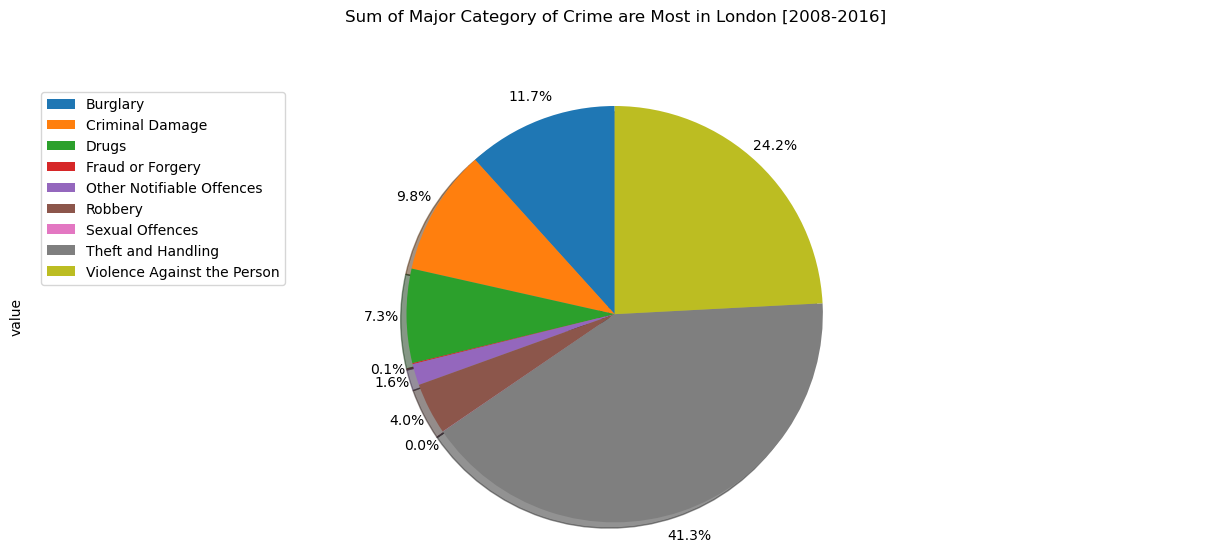

In [14]:
london['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,

                        )
plt.title("Sum of Major Category of Crime are Most in London [2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=london.index, loc='upper left')
plt.show()

In [16]:
crime= df.major_category.value_counts()
crime

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

<AxesSubplot:title={'center':'Sum of Crimes at Major Category in London from 2008-2016'}>

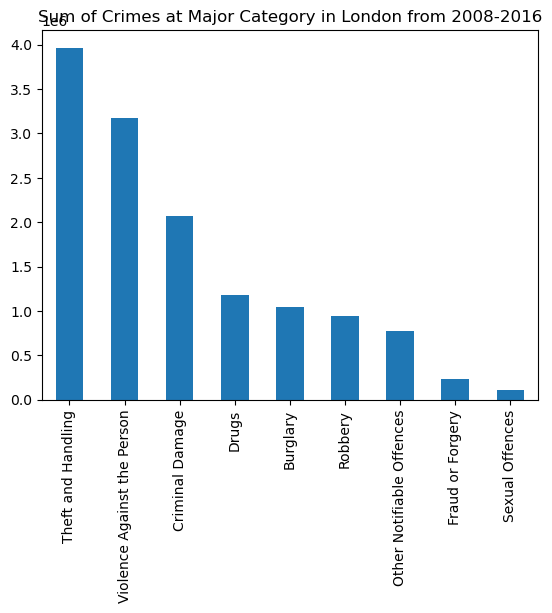

In [17]:
crime.plot.bar(title = "Sum of Crimes at Major Category in London from 2008-2016", fontsize=10)

In [18]:
crime= df.minor_category.value_counts(ascending=False)
crime

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

<AxesSubplot:title={'center':'Sum of Crimes at Minor Category in London from 2008-2016'}>

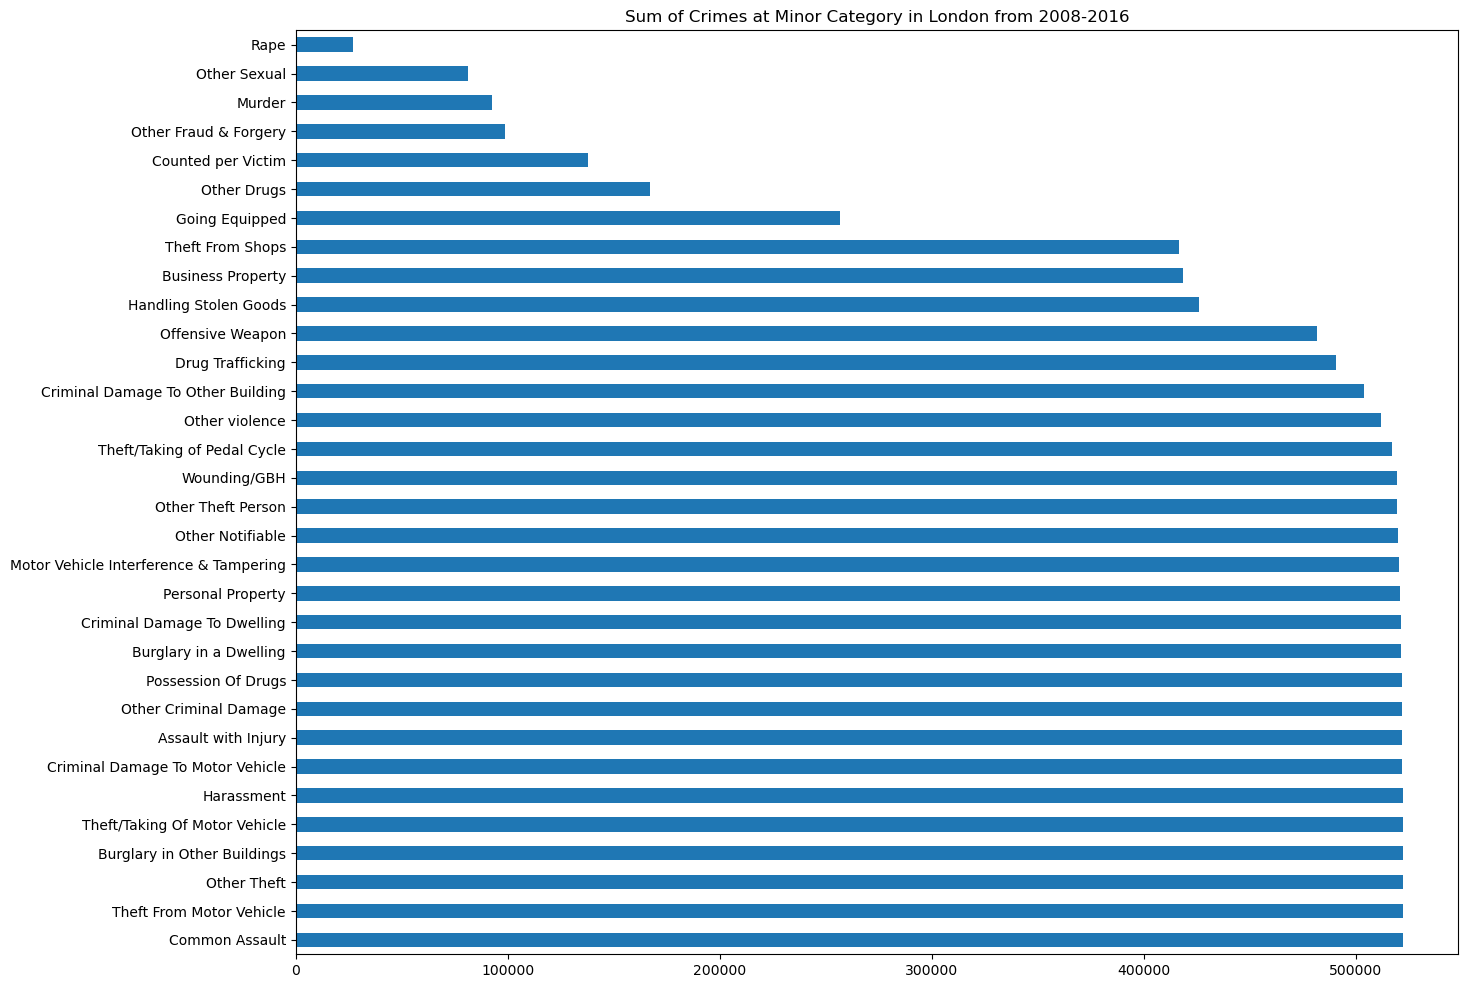

In [19]:
crime.plot.barh(figsize=(15, 12),
                    title = "Sum of Crimes at Minor Category in London from 2008-2016")

### Crimes per Year, Crimes per Month

In [21]:
crimesPerYear, crimesPerMonth= {},{}
# months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
months=['1','2','3','4','5','6','7','8','9','10','11','12']

for year in np.sort(df['year'].unique()):
    crimesY=df.loc[(df['year']==year)]
    crimesPerYear[year]=sum(crimesY['value'])
    crimesPerMonth[year]=[]
    
    for month in months:
        crimesM= crimesY.loc[crimesY['month']==month]
        crimesPerMonth[year].append(sum(crimesM['value']))
        
valSort= list(crimesPerYear.values())
valSort.sort()
cpmMatrix = np.mean([crimesPerMonth[key] for key in crimesPerYear.keys()], axis=0)


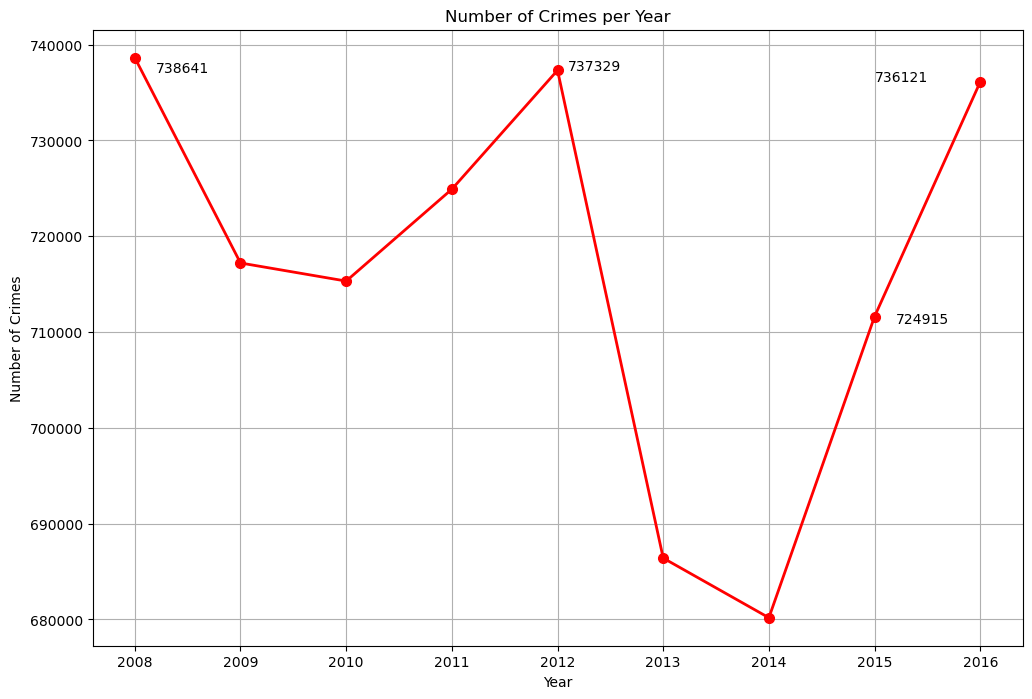

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(len(crimesPerYear.keys())), list(crimesPerYear.values()),
        linewidth= 2, color='red', marker='o', markersize=7.0)
plt.annotate(valSort[-1], (0.2, valSort[-1] - 1500))
plt.annotate(valSort[-2], (4.1, valSort[-2]))
plt.annotate(valSort[-3], (7., valSort[-3]))
plt.annotate(valSort[-4], (7.2, valSort[-7]-700))

plt.xticks(range(len(crimesPerYear.keys())), crimesPerYear.keys())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.grid()

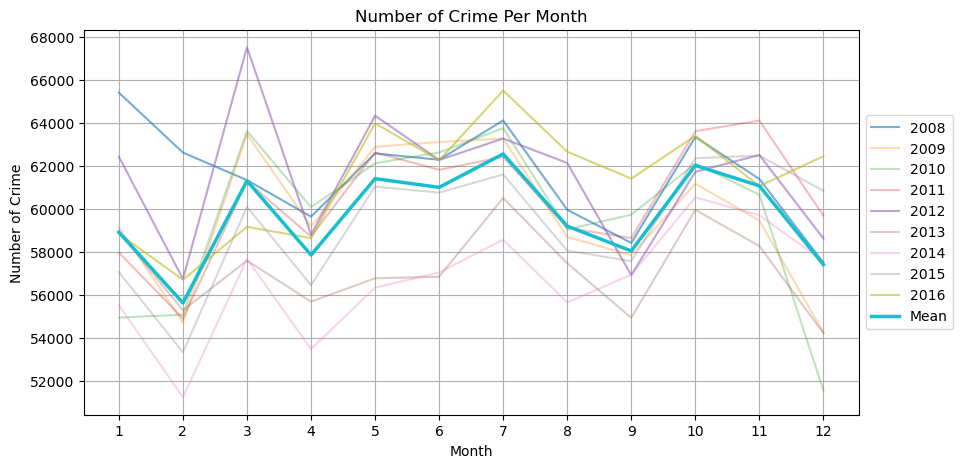

In [17]:
plt.figure(figsize=(10,5))

for year in crimesPerMonth.keys():
    if int(year) in [2008,2012,2016]:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.6)
    else:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.3)
plt.plot(range(12), cpmMatrix, label='Mean', linewidth=2.5)
plt.xticks(range(len(df['month'].unique())), months)
plt.xlabel("Month")
plt.ylabel("Number of Crime")
plt.title("Number of Crime Per Month")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Scatter Plot

In [24]:
year_2014= df.loc[df['year']=='2014']
months = year_2014['month'].unique()
months.sort()

sum_months= year_2014.groupby(['month']).sum()
total= sum_months['value'].to_numpy()
name_of_month= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
print("Number of Crime in each month in the year 2014")
print(name_of_month)
print(total)
n= np.arange(len(months))
x_range= range(1,13)


Number of Crime in each month in the year 2014
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']
[55515 60537 59704 57565 51222 57669 53467 56327 57039 58564 55641 56933]


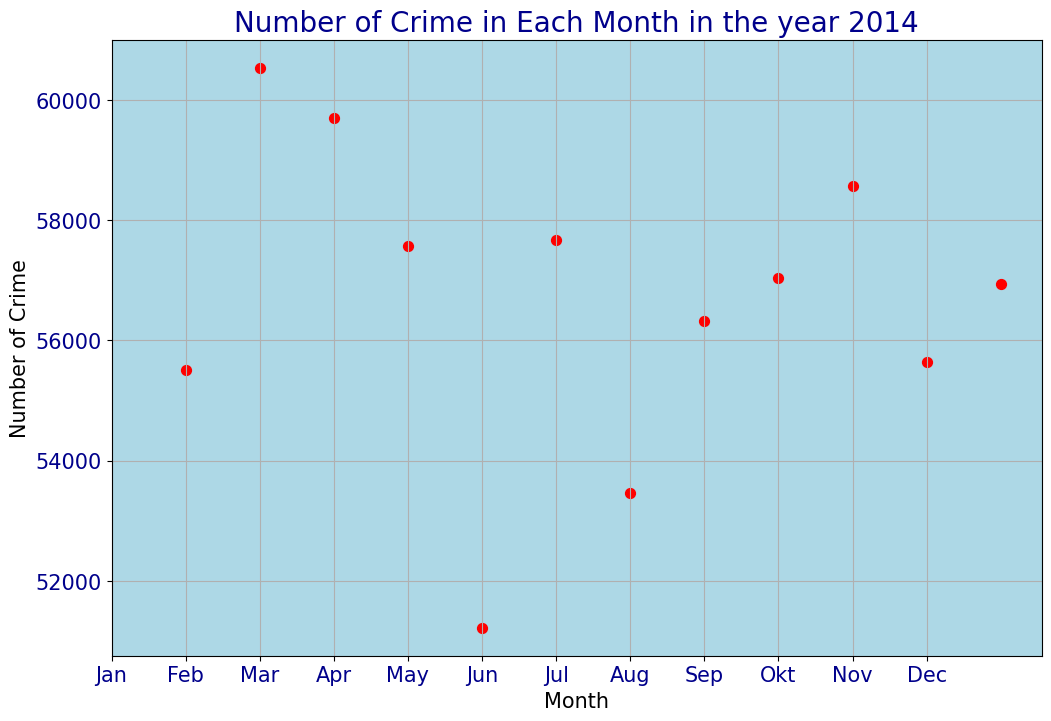

In [25]:
plt.figure(figsize=(12,8))
ax= plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)
plt.title("Number of Crime in Each Month in the year 2014", color= 'darkblue', fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Crime", fontsize=15)
plt.xticks(n, name_of_month)
plt.xticks(color='darkblue', fontsize=15)
plt.yticks(color='darkblue', fontsize=15)
plt.grid()

In [28]:
df_crimes_val = df.loc[df['value']!=0]
df_crimes_val.describe(include=np.object)

C:\Users\USER\AppData\Local\Temp\ipykernel_5600\3985195220.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_crimes_val.describe(include=np.object)


,lsoa_code,borough,major_category,minor_category,year,month
count,3419099,3419099,3419099,3419099,3419099,3419099
unique,4835,33,9,32,9,12
top,E01004734,Lambeth,Theft and Handling,Other Theft,2016,7
freq,2387,152784,1136994,297281,392042,296151


# Folium maps

In [ ]:
import geopandas as gpd
london_map = gpd.read_file('london.csv')
crimesPerBorough = df_crimes_val.groupby('borough')['value'].sum()
joined = london_map.set_index('NAME').join(crimesPerBorough)

joined['coords'] = joined['geometry'].\
    apply(lambda x: x.representative_point().coords[:])
joined['coords'] = [coords[0] for coords in joined['coords']]

In [ ]:
joined.plot(column='value', cmap='Blues', linewidth=0.9, edgecolor='black', 
            figsize=(15, 12))
plt.axis('off')
plt.title('Number of Crimes per Borough', fontsize=15)
scalarMap = plt.cm.ScalarMappable(cmap='Blues', 
                           norm=plt.Normalize(vmin=min(joined['value']), 
                                              vmax=max(joined['value'])))
scalarMap._A = []
cbar = plt.colorbar(scalarMap, shrink=0.5)
for idx, row in joined.iterrows():
    plt.annotate(s=idx, xy=row['coords'],
                 horizontalalignment='center', fontsize=9)


# WordCloud

In [ ]:
freq_borough = df_crimes['borough']
freq_borough

In [ ]:
freq_borough = freq_borough.to_csv("london.csv", header=None, index=None, sep=' ', mode='a')

In [ ]:
borough = open('london.csv','r').read()

In [ ]:
stopwords = set(STOPWORDS)
borough_wc = WordCloud(
        background_color='white',
        stopwords=stopwords)
borough_wc.generate(borough)

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(borough_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Analisis Keseluruhan
Dataset ini memiliki 7 Atribut/feature terdapat 9 kategori major dan 32 jenis kejahatan kategori minor dari periode tahun 2008 - 2016. variable value merupakan satu satunya variabel numeric pada dataset. var value mewakili jumlah laporan bulanan kategori kejahatan pada setiap wilayah dengan unique valuenya 247, maximal value 309 dan minimal value adalah 0 . Data hasil Pie chart diatas kita dapat melihat bahwa kejahatan dengan jumlah tertinggi pada major crime category adalah Theft and Handling dengan persentase 41.3%, dan diikuti Violence Against the Person yang mengambil tempat kedua dengan persentase 24.2%. Pada Bar chart diatas menampilkan hasil bahwa Theft from motor Vehicle, common assault dan pencurian lainnya menjadi kejahatan kategori minor terbanyak dengan total kasus 522180 dan jumlah kejahatan kategori minor paling sedikit kasusnya adalah Rape dengan total kasus 27000 per tahun 2008 - 2016